**Integrantes**

Kendra Artavia Caballero

Alexia Alvarado Alfaro

Jose Soto Perez

Johey Artavia Barrantes

## **Base de datos**

In [ ]:
# country: Nombre pais.
# iso3: Es una abreviacion de cada pais con 3 letras.
# year: Año de muerte.
# month: Mes de muerte.
# sex: Sexo (Femenino o Masculino).
# age_group: Grupo de edad por intervalos(0 a 24, 25 a 34, 35 a 44, ..., 85 o más).
# type: Tipo de estimación para determinado año y mes (reportado o previsto)
# expected.mean: Media de muertes esperadas (valor esperado teórico) por todas las causas por ubicación, año y mes.
# acm.mean: Media de muertes estimadas (basado en datos reales recopilados) por todas las causas por ubicación, año y mes.
# excess.mean*: Media de muertes en exceso asociadas con la pandemia de COVID-19 por todas las causas por ubicación, año y mes.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Covid.csv')
data=pd.DataFrame(df)

In [ ]:
print(data)

          Country iso3  year  month     sex age_group       type  \
0     Afghanistan  AFG  2020      1  Female      0-24  predicted   
1     Afghanistan  AFG  2020      2  Female     25-34  predicted   
2     Afghanistan  AFG  2020      3  Female     35-44  predicted   
3     Afghanistan  AFG  2020      4  Female     45-54  predicted   
4     Afghanistan  AFG  2020      5  Female     55-64  predicted   
...           ...  ...   ...    ...     ...       ...        ...   
4651     Zimbabwe  ZWE  2021      8    Male     45-54  predicted   
4652     Zimbabwe  ZWE  2021      9    Male     55-64  predicted   
4653     Zimbabwe  ZWE  2021     10    Male     65-74  predicted   
4654     Zimbabwe  ZWE  2021     11    Male     75-84  predicted   
4655     Zimbabwe  ZWE  2021     12    Male       >85  predicted   

      expected.mean  acm.mean  excess.mean*  
0             23088     23425           337  
1             22412     22461            49  
2             21921     20939          -982  

# **DESCRIPCIÓN DE PROCESAMIENTO DE LA INFORMACIÓN**

grupo de datos por dos columnas

In [6]:
dataFiltered = data.loc[(data['Country']=="Belgium")&(data['sex']=="Female")]
print(dataFiltered)

     Country iso3  year  month     sex age_group      type  expected.mean  \
288  Belgium  BEL  2020      1  Female      0-24  reported          10026   
289  Belgium  BEL  2020      2  Female     25-34  reported          10278   
290  Belgium  BEL  2020      3  Female     35-44  reported          10039   
291  Belgium  BEL  2020      4  Female     45-54  reported           9110   
292  Belgium  BEL  2020      5  Female     55-64  reported           8591   
293  Belgium  BEL  2020      6  Female     65-74  reported           8278   
294  Belgium  BEL  2020      7  Female     75-84  reported           8362   
295  Belgium  BEL  2020      8  Female       >85  reported           8238   
304  Belgium  BEL  2021      5  Female      0-24  reported           8559   
305  Belgium  BEL  2021      6  Female     25-34  reported           8265   
306  Belgium  BEL  2021      7  Female     35-44  reported           8333   
307  Belgium  BEL  2021      8  Female     45-54  reported           8231   

In [7]:
columnas_a_mostrar = ["Country", "sex", "expected.mean", "acm.mean", "excess.mean*" , "year"]
pais = (input("Digite el  país a buscar: "))
sexo = (input("Ingrese el género a buscar: "))
dataFiltered = data.loc[(data['Country'] == pais) & (data['sex'] == sexo )][columnas_a_mostrar]
print(dataFiltered)

Digite el  país a buscar: Belgium
Ingrese el género a buscar: Female
     Country     sex  expected.mean  acm.mean  excess.mean*  year
288  Belgium  Female          10026     10185            32  2020
289  Belgium  Female          10278      9378         -1027  2020
290  Belgium  Female          10039     11668          1502  2020
291  Belgium  Female           9110     15294          6057  2020
292  Belgium  Female           8591      9538           820  2020
293  Belgium  Female           8278      7993          -412  2020
294  Belgium  Female           8362      8005          -484  2020
295  Belgium  Female           8238      9848          1483  2020
304  Belgium  Female           8559      9262           699  2021
305  Belgium  Female           8265      8156          -113  2021
306  Belgium  Female           8333      8456           119  2021
307  Belgium  Female           8231      8296            61  2021
308  Belgium  Female           8158      8296           134  2021
309  Be

sort de un grupo de datos, los primeros 10

In [9]:
#Los 10 primeros promedio con mayor muertes asociadas con el covid en el sexo masculino
sexo = (input("Ingrese el género a buscar: "))
dataFiltereadM=data.loc[(data['sex']==sexo)]
print(dataFiltereadM.sort_values(by=['excess.mean*'],ascending=False)[['Country', 'excess.mean*','sex'  ,"month" , "year" ]].head(10))

Ingrese el género a buscar: Male
                 Country  excess.mean*   sex  month  year
1887               India        334180  Male      4  2021
1880               India        312170  Male      9  2020
1881               India        229869  Male     10  2020
1884               India        216738  Male      1  2021
1883               India        216065  Male     12  2020
1882               India        135686  Male     11  2020
3549  Russian Federation        125422  Male     10  2021
1885               India        121815  Male      2  2021
3550  Russian Federation         98519  Male     11  2021
1867           Indonesia         94954  Male      8  2021


Análisis de exceso de muertes en el grupo de edad 65-74 años en Italia

In [ ]:
def filtrar_y_calcular_exceso(data, pais):
    columnas_a_mostrar = ["Country", "age_group", "expected.mean", "acm.mean", "excess.mean*"]
    dataFiltered = data.loc[(data['Country'] == pais) & (data['age_group'] == "65-74")][columnas_a_mostrar]
    exceso_promedio = dataFiltered['excess.mean*'].mean()
    print(dataFiltered)
    print(f"Exceso promedio de muertes en el grupo de edad 65-74 años en {pais}: {exceso_promedio:.2f}")

pais_a_buscar = input("Ingrese el nombre del país a buscar: ")
filtrar_y_calcular_exceso(data, pais_a_buscar)

Ingrese el nombre del país a buscar: Italy
     Country age_group  expected.mean  acm.mean  excess.mean*
2021   Italy     65-74          48576     48589            12
2029   Italy     65-74          58187     59389          1195
2037   Italy     65-74          49319     54463          5137
Exceso promedio de muertes en el grupo de edad 65-74 años en Italy: 2114.67



Comparación de exceso de muertes entre hombres y mujeres en España durante el año 2020


In [ ]:
def calcular_exceso_por_sexo(data, pais, ano):
    dataFiltered = data.loc[(data['Country'] == pais) & (data['year'] == ano)]
    exceso_hombres = dataFiltered.loc[dataFiltered['sex'] == "Male"]['excess.mean*'].sum()
    exceso_mujeres = dataFiltered.loc[dataFiltered['sex'] == "Female"]['excess.mean*'].sum()

    print(f"Exceso total de muertes en hombres en {pais} durante {ano}: {exceso_hombres}")
    print(f"Exceso total de muertes en mujeres en {pais} durante {ano}: {exceso_mujeres}")

pais_a_buscar = input("Ingrese el nombre del país a buscar: ")
ano_a_buscar = int(input("Ingrese el año a buscar: "))
calcular_exceso_por_sexo(data, pais_a_buscar, ano_a_buscar)

Ingrese el nombre del país a buscar: Spain
Ingrese el año a buscar: 2020
Exceso total de muertes en hombres en Spain durante 2020: 20579
Exceso total de muertes en mujeres en Spain durante 2020: 54621


Análisis del exceso de muertes por país durante los meses de invierno

In [ ]:
meses_invierno = [12, 1, 2]
dataFiltered = data[data['month'].isin(meses_invierno)]
exceso_por_pais = dataFiltered.groupby('Country')['excess.mean*'].sum()
print("Exceso total de muertes por país durante los meses de invierno:")
print(exceso_por_pais.sort_values(ascending=False).head(10))


Exceso total de muertes por país durante los meses de invierno:
Country
India                       768282
Indonesia                   314942
United States of America    302316
Russian Federation          246090
Mexico                      190833
Brazil                      119687
South Africa                104707
China                        57721
The United Kingdom           49536
Poland                       49160
Name: excess.mean*, dtype: int64


Análisis de la relación entre muertes esperadas y muertes reales por país y año


In [ ]:
muertes_por_pais_año = data.groupby(['Country', 'year']).agg({
    'expected.mean': 'mean',
    'acm.mean': 'mean'
}).reset_index()

# diferencias absolutas y relativas
muertes_por_pais_año['Absolute_Difference'] = muertes_por_pais_año['acm.mean'] - muertes_por_pais_año['expected.mean']
muertes_por_pais_año['Relative_Difference'] = (muertes_por_pais_año['Absolute_Difference'] / muertes_por_pais_año['expected.mean']) * 100

print("Relación entre muertes esperadas y muertes reales por país y año:")
print(muertes_por_pais_año.sort_values(by='Absolute_Difference', ascending=False).head(10))


Relación entre muertes esperadas y muertes reales por país y año:
                      Country  year  expected.mean      acm.mean  \
157                     India  2021  774931.583333  1.100292e+06   
156                     India  2020  768410.500000  8.375338e+05   
287        Russian Federation  2021  144035.666667  2.034662e+05   
159                 Indonesia  2021  156969.500000  2.161023e+05   
371  United States of America  2021  247477.250000  2.893132e+05   
47                     Brazil  2021  115218.833333  1.546352e+05   
370  United States of America  2020  243543.666667  2.825138e+05   
286        Russian Federation  2020  146530.000000  1.782155e+05   
158                 Indonesia  2020  154175.333333  1.840261e+05   
221                    Mexico  2021   64870.333333  9.184358e+04   

     Absolute_Difference  Relative_Difference  
157        325359.916667            41.985631  
156         69123.250000             8.995615  
287         59430.500000            41.26

# **ANÁLISIS DE LOS DATOS**

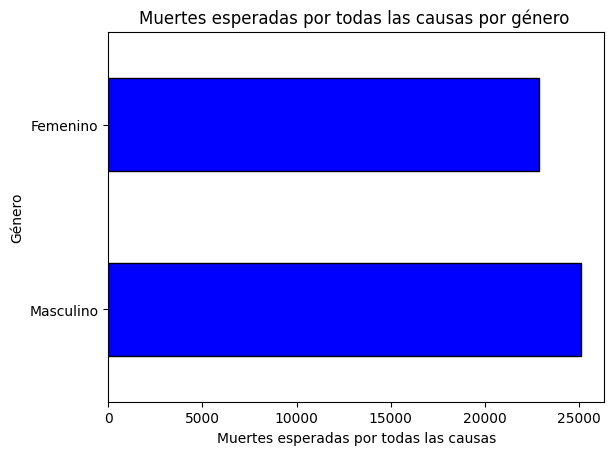

In [ ]:
valor_por_genero=df.groupby("sex")["expected.mean"].mean()
valor_por_genero.head(2).plot.barh(color='blue', edgecolor='black')

plt.title('Muertes esperadas por todas las causas por género ')
plt.xlabel('Muertes esperadas por todas las causas')
etiquetas_eje_y = ["Masculino", "Femenino"]
plt.gca().set_yticklabels(etiquetas_eje_y)

plt.ylabel('Género')
plt.show()


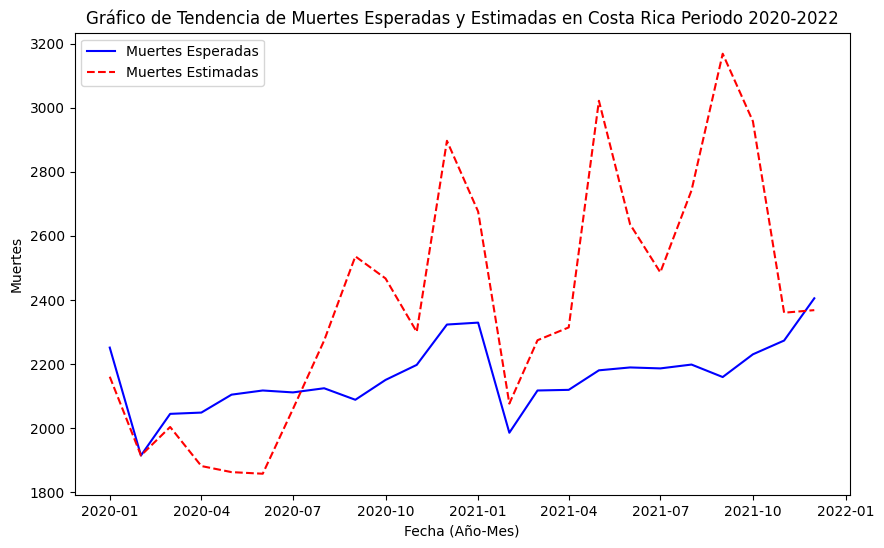

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
costa_rica_df = df[df['Country'] == 'Costa Rica'].copy()
costa_rica_df.loc[:, 'date'] = pd.to_datetime(costa_rica_df[['year', 'month']].assign(day=1))
plt.figure(figsize=(10, 6))
plt.plot(costa_rica_df['date'], costa_rica_df['expected.mean'], label='Muertes Esperadas', color='blue')
plt.plot(costa_rica_df['date'], costa_rica_df['acm.mean'], label='Muertes Estimadas', color='red', linestyle='--')
plt.title('Gráfico de Tendencia de Muertes Esperadas y Estimadas en Costa Rica Periodo 2020-2022')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Muertes')
plt.legend()
plt.show()








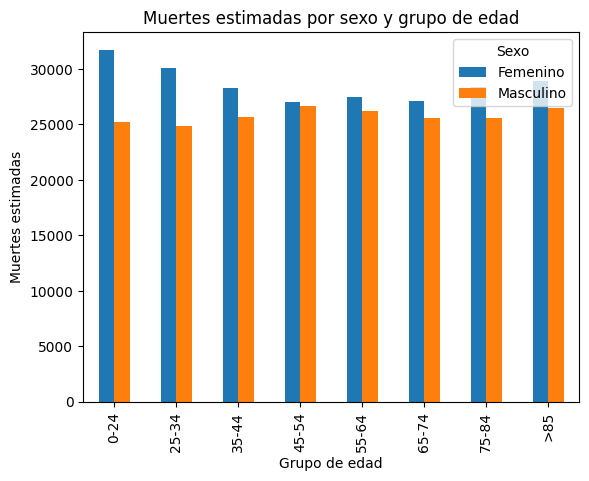

In [ ]:
pivot_table = df.pivot_table(values='acm.mean', index='age_group', columns='sex', aggfunc='mean')
ax = pivot_table.plot(kind='bar', stacked=False)
plt.title('Muertes estimadas por sexo y grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Muertes estimadas')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Femenino', 'Masculino'], title='Sexo')
plt.show()


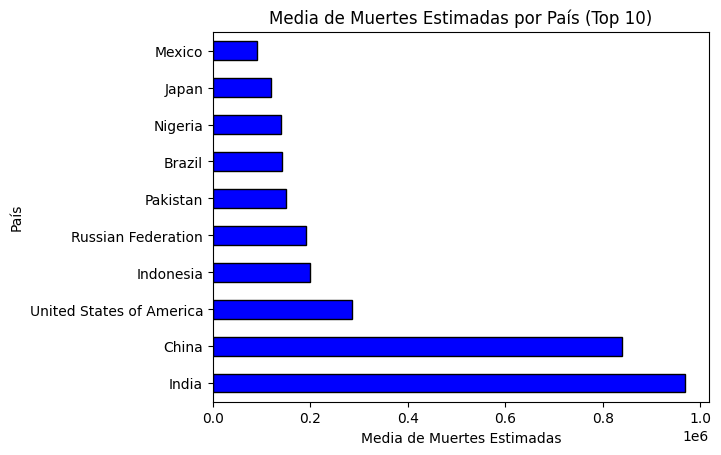

In [ ]:
# Agrupar los datos por país y calcular la media de muertes estimadas
muertes_estimadas_por_pais = data.groupby("Country")["acm.mean"].mean()

# Obtener los 10 países con mayor media de muertes estimadas
top_10_paises = muertes_estimadas_por_pais.sort_values(ascending=False).head(10)

# Crear el gráfico de barras horizontal
top_10_paises.plot.barh(color='blue', edgecolor='black')

# Personalizar el título y las etiquetas de los ejes
plt.title('Media de Muertes Estimadas por País (Top 10)')
plt.xlabel('Media de Muertes Estimadas')
plt.ylabel('País')

# Mostrar el gráfico
plt.show()